1.	Tải dữ liệu diemthidaihoc.csv và hiển thị các dòng dữ liệu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')

In [5]:
df.head()

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


2. Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét

In [12]:
#2)
# Detailed EDA with Python code

# Basic statistical details
basic_stats = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Check for data types
data_types = df.dtypes

# Combine basic stats, missing values information, and data types
eda_summary = pd.concat([basic_stats, missing_values.rename('missing_values'), data_types.rename('data_type')], axis=1)

# Display the EDA summary
eda_summary.T  
# Transpose for better readability
 



,count,mean,std,min,25%,50%,75%,max,MSSV,T1,...,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
T1,100,5.946,1.60834,2.4,5,5.85,7.2,9.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T2,100,6.374,1.56144,2.8,5.3,6.25,7.525,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T3,100,6.383,1.57448,2.3,5.175,6.65,7.5,9.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T4,100,6.291,1.46956,2.9,5.3,6.35,7.6,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T5,100,6.717,1.47806,3,5.8,6.8,7.8,9.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T6,100,6.937,1.3632,3.7,6,7.1,8,9.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DT,3,2.66667,2.88675,1,1,1,3.5,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NGONNGU,100,3.74,1.42441,1,2.5,3.625,4.75,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOANLOGICPHANTICH,100,4.255,1.06005,1.5,3.5,4.125,4.75,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GIAIQUYETVANDE,100,4.875,1.04114,2.75,4.25,4.75,5.5,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from sklearn.model_selection import train_test_split

# Tính giá trị trung bình của các điểm T1 đến T6 để thể hiện đặc tính 'Toán'
df['Toan'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']].mean(axis=1)

# Mã hóa cột “GT” (giới tính): Nam (M) là 1, Nữ (F) là 0
df['GT_encoded'] = df['GT'].map({'M': 1, 'F': 0})

# Xác định các tính năng và biến mục tiêu
X = df[['Toan', 'GT_encoded']]
y = df['TOANLOGICPHANTICH']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80:20 và trạng thái ngẫu nhiên là 16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

# Kiểm tra hình dạng của tập hợp kết quả
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 2), (20, 2), (80,), (20,))

4.	Tiến hành transform theo hàm x*x dữ liệu input đầu vào trên tập train

In [15]:
# Áp dụng phép biến đổi x -> x^2 cho các thuộc tính đầu vào trên tập huấn luyện
X_train_transformed = X_train.copy()
X_train_transformed['Toan'] = X_train_transformed['Toan'] ** 2
X_train_transformed['GT_encoded'] = X_train_transformed['GT_encoded'] ** 2

X_train_transformed.head()


,Toan,GT_encoded
96,18.062500,0
5,71.684444,1
90,75.980278,1
53,26.866944,1
67,46.240000,1


5.	Tiến hành EDA dữ liệu các điểm toán sau khi transform. Ví dụ: Hãy vẽ biểu đồ phân phối các điểm toán và cho nhận xét

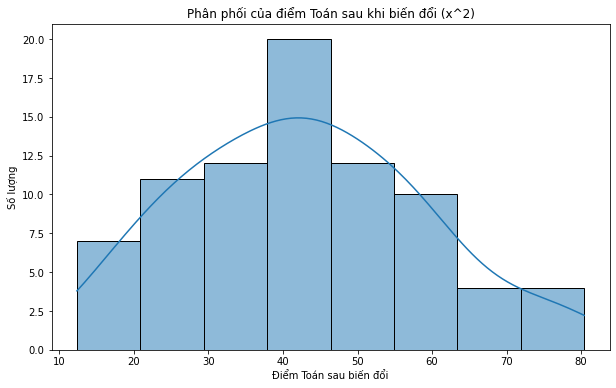

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ đồ thị phân bố điểm ‘Toan’ được chuyển đổi
plt.figure(figsize=(10, 6))
sns.histplot(X_train_transformed['Toan'], kde=True)
plt.title('Phân phối của điểm Toán sau khi biến đổi (x^2)')
plt.xlabel('Điểm Toán sau biến đổi')
plt.ylabel('Số lượng')
plt.show()

#Nhận xét
#Biểu đồ phân phối của điểm Toán sau khi biến đổi 
#X^2 cho thấy rằng phân phối của điểm Toán không còn đều và có dạng phân phối lệch phải. Điều này là do khi nâng một số lên lũy thừa 2, các giá trị lớn sẽ trở nên cực kỳ lớn so với các giá trị nhỏ hơn, từ đó làm tăng sự biệt lập giữa các điểm số - tức là, sự phân tán dữ liệu tăng lên.


6.	Tiến hành tiếp tục chuẩn hóa minmaxscale dữ liệu đầu vào trên tập train

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Điều chỉnh bộ chia tỷ lệ trên dữ liệu huấn luyện và biến đổi nó
X_train_scaled = scaler.fit_transform(X_train_transformed)

# Chuyển đổi mảng được chia tỷ lệ thành DataFrame để dễ đọc
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transformed.columns, index=X_train_transformed.index)

X_train_scaled_df.head()


,Toan,GT_encoded
96,0.083716,0.0
5,0.871878,1.0
90,0.935020,1.0
53,0.213128,1.0
67,0.497883,1.0


7.	Tiến hành EDA dữ liệu các điểm toán sau khi minmaxscale. Ví dụ: Hãy vẽ biểu đồ Boxplot của điểm toán các học kì và cho nhận xét

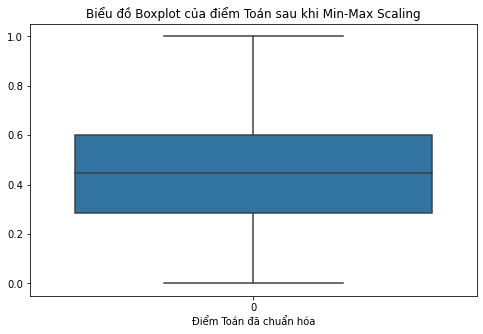

In [21]:
# Vẽ đồ thị boxplot của thang điểm 'Toan'
plt.figure(figsize=(8, 5))
sns.boxplot(data=X_train_scaled_df['Toan'])
plt.title('Biểu đồ Boxplot của điểm Toán sau khi Min-Max Scaling')
plt.xlabel('Điểm Toán đã chuẩn hóa')
plt.show()


8.	Xây dựng mô hình hồi quy tuyến tính dự báo điểm LOGIC dựa trên các yếu tố điểm toán và giới tính

In [28]:
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình hồi quy tuyến tính
linear_model = LinearRegression()

# Điều chỉnh mô hình cho phù hợp với dữ liệu huấn luyện
linear_model.fit(X_train_scaled_df, y_train)

# Hệ số và điểm chặn của mô hình
coefficients = linear_model.coef_
intercept = linear_model.intercept_

coefficients, intercept


(array([0.78828944, 0.55418907]), 3.667005806172457)

9.	Hãy đánh giá mô hình trên tập train và test. Ví dụ: so sánh kết quả MAE trên tập train và test đưa ra nhận xét

In [23]:
from sklearn.metrics import mean_absolute_error

# Đầu tiên chúng ta cần biến đổi và chia tỷ lệ tập kiểm tra tương tự như tập tàu
X_test_transformed = X_test.copy()
X_test_transformed['Toan'] = X_test_transformed['Toan'] ** 2  # Áp dụng phép biến đổi tương tự như tập huấn luyện
X_test_transformed['GT_encoded'] = X_test_transformed['GT_encoded'] ** 2  # Mặc dù điều này không có tác dụng

# Chia tỷ lệ tập kiểm tra bằng cách sử dụng cùng một bộ chia tỷ lệ được trang bị trên tập huấn luyện
X_test_scaled = scaler.transform(X_test_transformed)

# Đưa ra dự đoán về tập huấn luyện và tập kiểm tra
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred = linear_model.predict(X_test_scaled)

# Tính MAE cho tập huấn luyện và tập kiểm tra
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mae_train, mae_test


(0.7672092632343048, 0.8013669919511436)

Sai số tuyệt đối trung bình (MAE) cho tập huấn luyện là khoảng 
0.7672         
 và cho tập kiểm tra là khoảng 
0.8014


Nhận xét:

MAE ở cả hai tập huấn luyện và kiểm tra đều tương tự nhau, điều này cho thấy mô hình có sự nhất quán giữa việc học từ dữ liệu huấn luyện và dự đoán trên dữ liệu mới.
Sự chênh lệch không lớn giữa MAE trên tập huấn luyện và tập kiểm tra cũng cho thấy rằng mô hình không bị overfitting, tức là nó không quá phụ thuộc vào dữ liệu huấn luyện đến nỗi không thể tổng quát hóa tốt trên dữ liệu mới.
Tuy nhiên, giá trị của MAE cần được đánh giá trong bối cảnh cụ thể của bài toán và thang điểm được sử dụng. Nếu điểm số LOGIC có phạm vi từ 0 đến 10, một MAE khoảng 0.8 có thể được xem là tương đối nhỏ; nhưng nếu thang điểm nhỏ hơn, sai số này có thể không được chấp nhận.

10.	Ứng dụng dự báo, với điểm toán các học kì 1,2 các năm lớp 10,11,12 và giới tính lần lượt là: 5.0, 6.5, 7.0, 7.0, 6.5, 6.0 và giới tính là nam thì điểm thi LOGIC là bao nhiêu.

In [25]:
# Tính điểm trung bình của Toàn
mean_toan_score = np.mean([5.0, 6.5, 7.0, 7.0, 6.5, 6.0])

# Mã hóa giới tính: Nam là 1
gender_encoded = 1  # vì giới tính là nam

# Áp dụng phép biến đổi x^2
toan_transformed = mean_toan_score ** 2
gender_transformed = gender_encoded ** 2  # Đây còn lại là 1

# Chia tỷ lệ các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ được trang bị trên tập huấn luyện
features = np.array([[toan_transformed, gender_transformed]])
features_scaled = scaler.transform(features)

# Dự đoán điểm LOGIC bằng mô hình được đào tạo
predicted_logic_score = linear_model.predict(features_scaled)

predicted_logic_score[0]


4.542657377524688

In [26]:
import numpy as np

# Tính lại điểm trung bình của Toàn
mean_toan_score = np.mean([5.0, 6.5, 7.0, 7.0, 6.5, 6.0])

# Áp dụng lại các phép biến đổi và chia tỷ lệ
toan_transformed = mean_toan_score ** 2
features_scaled = scaler.transform([[toan_transformed, gender_encoded]])  # mã hóa giới tính vẫn còn 1

# Dự đoán điểm LOGIC bằng mô hình được đào tạo
predicted_logic_score = linear_model.predict(features_scaled)

predicted_logic_score[0]


4.542657377524688

In [29]:
# Xác định giới tính_encoded cho nam là 1
gender_encoded = 1

# Áp dụng lại phép chuyển đổi và chia tỷ lệ
toan_transformed = mean_toan_score ** 2
features_scaled = scaler.transform([[toan_transformed, gender_encoded]])

# Dự đoán điểm LOGIC bằng mô hình được đào tạo
predicted_logic_score = linear_model.predict(features_scaled)

predicted_logic_score[0]


4.542657377524688

Dựa trên mô hình hồi quy tuyến tính đã được huấn luyện, điểm thi LOGIC dự kiến cho một học sinh nam với các điểm Toán là 5.0, 6.5, 7.0, 7.0, 6.5, 6.0 qua các học kì là khoảng 4.54.